In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
data = pd.read_csv('data.csv')
data

,feature1,feature2,feature3,feature4,target
0,5.1,3.5,1.4,0.2,Class1
1,4.9,3.0,1.4,0.2,Class1
2,4.7,3.2,1.3,0.2,Class1
3,4.6,3.1,1.5,0.2,Class1
4,5.0,3.6,1.4,0.2,Class1
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Class3
145,6.3,2.5,5.0,1.9,Class3
146,6.5,3.0,5.2,2.0,Class3
147,6.2,3.4,5.4,2.3,Class3


In [4]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

missing_values

feature1    0
feature2    0
feature3    0
feature4    0
target      0
dtype: int64

In [5]:
# Encoding categorical target variable for classification
le = LabelEncoder()
data['target'] = le.fit_transform(data['target'])  # Encode target labels with value between 0 and n_classes-1

# Scale/normalize the features
scaler = StandardScaler()
features = ['feature1', 'feature2', 'feature3', 'feature4']  # List of feature columns
data[features] = scaler.fit_transform(data[features])


           feature1      feature2      feature3      feature4      target
count  1.490000e+02  1.490000e+02  1.490000e+02  1.490000e+02  149.000000
mean  -1.430623e-16 -3.099683e-16  4.768743e-17 -1.430623e-16    1.006711
std    1.003373e+00  1.003373e+00  1.003373e+00  1.003373e+00    0.817847
min   -1.882359e+00 -2.425614e+00 -1.575313e+00 -1.456862e+00    0.000000
25%   -9.110290e-01 -5.863444e-01 -1.234147e+00 -1.193264e+00    0.000000
50%   -6.111554e-02 -1.265269e-01  3.579562e-01  1.247222e-01    1.000000
75%    6.673817e-01  5.631992e-01  7.559821e-01  7.837155e-01    2.000000
max    2.488625e+00  3.092195e+00  1.779477e+00  1.706306e+00    2.000000


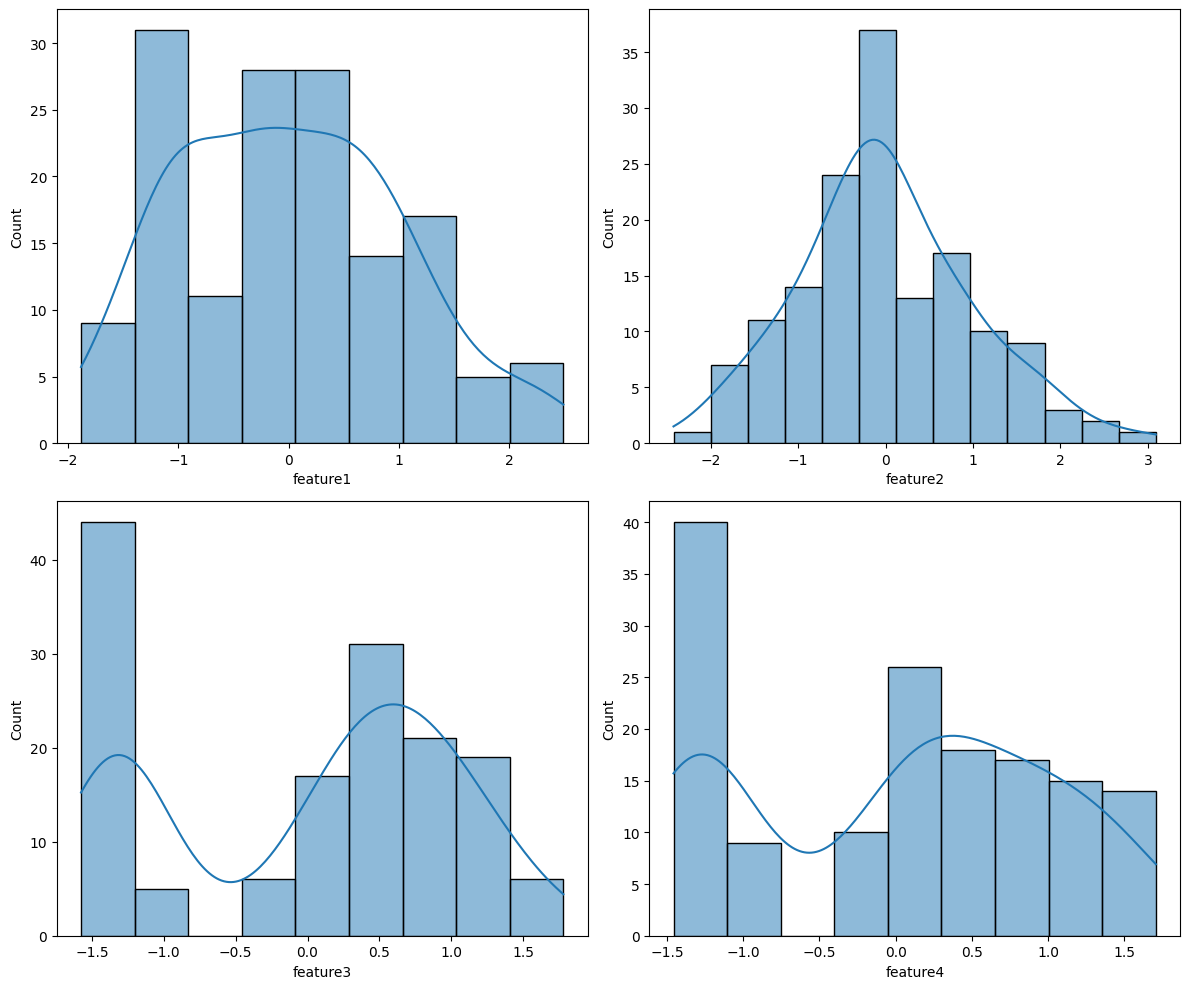

In [6]:
# Statistical Summary and Data Visualization
print(data.describe())
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
sns.histplot(data['feature1'], kde=True, ax=axes[0, 0])
sns.histplot(data['feature2'], kde=True, ax=axes[0, 1])
sns.histplot(data['feature3'], kde=True, ax=axes[1, 0])
sns.histplot(data['feature4'], kde=True, ax=axes[1, 1])
plt.tight_layout()
plt.show()


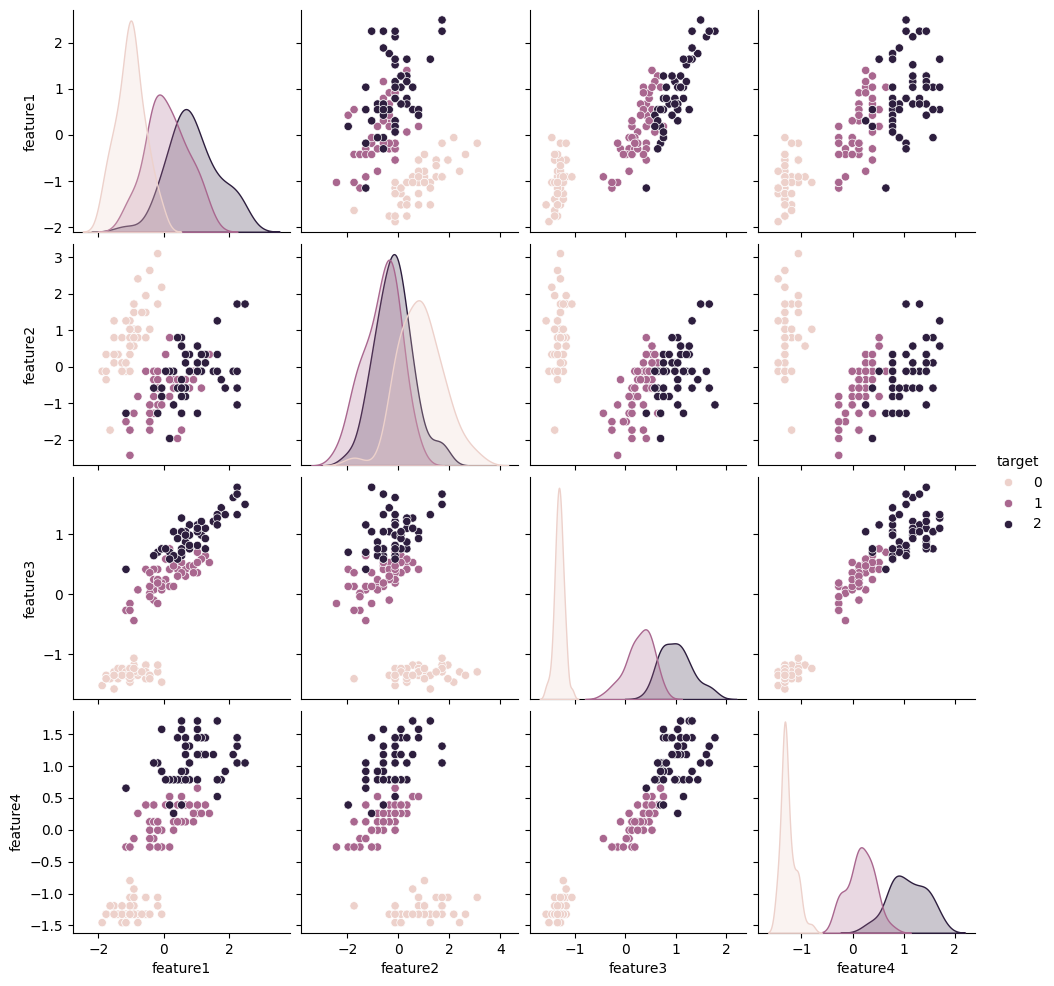

In [7]:
# Scatter plot to visualize relationships
sns.pairplot(data, hue='target', diag_kind='kde')
plt.show()


In [8]:
# Splitting the dataset for classification
X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize classifiers and regression models
log_reg = LogisticRegression()
dec_tree_cls = DecisionTreeClassifier()
rand_forest = RandomForestClassifier()
lin_reg = LinearRegression()
dec_tree_reg = DecisionTreeRegressor()

In [10]:
# Define function to train and predict models
def train_predict(model, X_train, y_train, X_test):
    model.fit(X_train, y_train)
    return model.predict(X_test)

In [11]:
# Evaluate classification models
def evaluate_classification_model(predictions, y_test):
    cm = confusion_matrix(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    prec = precision_score(y_test, predictions, average='macro')
    rec = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')
    return cm, acc, prec, rec, f1

In [12]:
# Evaluate regression models
def evaluate_regression_model(predictions, y_test):
    mse = mean_squared_error(y_test, predictions)
    r_squared = r2_score(y_test, predictions)
    return mse, r_squared

In [14]:

# Cross-validation function
def perform_cross_validation(model, X, y, cv=10, scoring='accuracy'):
    scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
    return scores.mean(), scores.std()

# Logistic Regression
log_pred = train_predict(log_reg, X_train, y_train, X_test)
log_cm, log_acc, log_prec, log_rec, log_f1 = evaluate_classification_model(log_pred, y_test)

# Decision Tree Classifier
dec_pred = train_predict(dec_tree_cls, X_train, y_train, X_test)
dec_cm, dec_acc, dec_prec, dec_rec, dec_f1 = evaluate_classification_model(dec_pred, y_test)

# Random Forest
rf_pred = train_predict(rand_forest, X_train, y_train, X_test)
rf_cm, rf_acc, rf_prec, rf_rec, rf_f1 = evaluate_classification_model(rf_pred, y_test)

# Linear Regression and Decision Tree Regressor
lin_reg_pred = train_predict(lin_reg, X_train, y_train, X_test)A
lin_reg_mse, lin_reg_r2 = evaluate_regression_model(lin_reg_pred, y_test)

dec_tree_reg_pred = train_predict(dec_tree_reg, X_train, y_train, X_test)
dec_tree_reg_mse, dec_tree_reg_r2 = evaluate_regression_model(dec_tree_reg_pred, y_test)

In [24]:
# Cross-validation results
log_cv_mean, log_cv_std = perform_cross_validation(log_reg, X, y)
dec_cv_mean, dec_cv_std = perform_cross_validation(dec_tree_cls, X, y)
rf_cv_mean, rf_cv_std = perform_cross_validation(rand_forest, X, y)
lin_reg_cv_mean, lin_reg_cv_std = perform_cross_validation(lin_reg, X, y, scoring='r2')
dec_tree_reg_cv_mean, dec_tree_reg_cv_std = perform_cross_validation(dec_tree_reg, X, y, scoring='r2')

# Print all results
print(f"Logistic Regression Metrics:\n CM-{log_cm} \nACCURACY-{log_acc}, PRECISION-{log_prec}, RECALL-{log_rec}, F1 SCORE-{log_f1}")
print(f"\nDecision Tree Classifier Metrics:\n CM-{dec_cm} \n ACCURACY-{dec_acc}, PRECISION-{dec_prec}, RECALL-{dec_rec}, F1 SCORE-{dec_f1}")
print(f"\nRandom Forest Metrics:\n CM-{rf_cm} \nACCURACY-{rf_acc}, PRECISION-{rf_prec}, RECALL{rf_rec}, F! SCORE-{rf_f1}")
print(f"\nLinear Regression Metrics: MSE-{lin_reg_mse}, Rsquared-{ lin_reg_r2}")
print(f"\nDecision Tree Regressor Metrics: MSE-{dec_tree_reg_mse}, Rsquared-{dec_tree_reg_r2}")
print("\n\n\nCross-Validation Scores (Mean, Std):")
print(f"\nLogistic Regression:MEAN-{log_cv_mean}, SD-{log_cv_std}")
print(f"\nDecision Tree Classifier: {dec_cv_mean}, SD-{dec_cv_std}")
print(f"\nRandom Forest: MEAN-{rf_cv_mean}, SD-{rf_cv_std}")
print(f"\nLinear Regression: MEAN-{lin_reg_cv_mean}, SD-{lin_reg_cv_std}")
print(f"\nDecision Tree Regressor: MEAN-{dec_tree_reg_cv_mean}, SD-{dec_tree_reg_cv_std}")

Logistic Regression Metrics:
 CM-[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]] 
ACCURACY-0.9, PRECISION-0.9285714285714285, RECALL-0.8888888888888888, F1 SCORE-0.8933333333333334

Decision Tree Classifier Metrics:
 CM-[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]] 
 ACCURACY-0.9, PRECISION-0.9285714285714285, RECALL-0.8888888888888888, F1 SCORE-0.8933333333333334

Random Forest Metrics:
 CM-[[10  0  0]
 [ 0  6  3]
 [ 0  0 11]] 
ACCURACY-0.9, PRECISION-0.9285714285714285, RECALL0.8888888888888888, F! SCORE-0.8933333333333334

Linear Regression Metrics: MSE-0.05830481558826368, Rsquared-0.9165749856447738

Decision Tree Regressor Metrics: MSE-0.1, Rsquared-0.8569157392686804



Cross-Validation Scores (Mean, Std):

Logistic Regression:MEAN-0.9600000000000002, SD-0.06110100926607785

Decision Tree Classifier: 0.96, SD-0.044221663871405324

Random Forest: MEAN-0.9666666666666666, SD-0.033333333333333326

Linear Regression: MEAN-0.15920023713952117, SD-0.32003456218964677

Decision Tree Regressor: MEAN-0.6, S